# CLIP

In [45]:
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import os
import torch
import skimage
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import json
from tqdm import tqdm
import clip
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [46]:
def get_model_info(model_ID, device):
    # Save the model to device
    model = CLIPModel.from_pretrained(model_ID).to(device)
    # Get the processor
    processor = CLIPProcessor.from_pretrained(model_ID)
    # Get the tokenizer
    tokenizer = CLIPTokenizer.from_pretrained(model_ID)
       # Return model, processor & tokenizer
    return model, processor, tokenizer
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
# Define the model ID
model_ID = "openai/clip-vit-base-patch32"
# Get model, processor & tokenizer
model, processor, tokenizer = get_model_info(model_ID, device)

In [47]:
image_data = load_dataset("conceptual_captions", split="train")

C:\Users\dell\anaconda3\lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for conceptual_captions contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conceptual_captions
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [48]:
image_data_df = pd.DataFrame(image_data[0:100])

In [49]:
def check_valid_URLs(image_URL):
    try:
        response = requests.get(image_URL)
        Image.open(BytesIO(response.content))
        return True
    except:
        return False
# def get_image(image_URL):
#     response = requests.get(image_URL)
#     image = Image.open(BytesIO(response.content)).convert("RGB")
#     return image

In [50]:
# Transform dataframe
image_data_df["is_valid"] = image_data_df["image_url"].apply(check_valid_URLs)
# Get valid URLs
image_data_df = image_data_df[image_data_df["is_valid"]==True]
# Get image from URL
#image_data_df["image"] = image_data_df["image_url"].apply(get_image)

In [51]:
image_data_df=image_data_df.reset_index(drop=True)

In [52]:
image_data_df

,image_url,caption,is_valid
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,True
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...,True
2,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...,True
3,https://thumb1.shutterstock.com/display_pic_wi...,cybernetic scene isolated on white background .,True
4,https://prismpub.com/wp-content/uploads/2016/1...,the jetty : different types of plants to estab...,True
...,...,...,...
67,http://l7.alamy.com/zooms/476f507779b646c4b9ae...,building and skyscraper light up at night,True
68,https://i.pinimg.com/736x/83/ab/4f/83ab4fbbb6a...,actor is an actor who started out as a lawyer .,True
69,https://i.pinimg.com/736x/58/2a/ec/582aecd2587...,color good with green couch in living room ......,True
70,https://ak8.picdn.net/shutterstock/videos/5281...,tree branches swing at real time with the wind...,True


In [53]:
X_train, X_test, y_train, y_test = train_test_split(image_data_df['image_url'], image_data_df['caption'], test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [54]:
train_data = pd.DataFrame({'image_url':X_train.values, 'caption': y_train.values})
val_data = pd.DataFrame({'image_url':X_val.values, 'caption': y_val.values})
test_data = pd.DataFrame({'image_url':X_test.values, 'caption': y_test.values})

In [55]:
train_data

,image_url,caption
0,http://jesuitpride.com/images/2017/7/11/Fairfi...,person finishes at the top
1,https://media.gettyimages.com/photos/bryan-mcc...,# of the sports team skates against sports tea...
2,http://2.bp.blogspot.com/-cZpqM2kr2uc/U6v-pnIx...,photo of a deer and wildfire
3,https://thumb1.shutterstock.com/display_pic_wi...,traditional ornamental floral paisley bandanna .
4,https://us.123rf.com/450wm/olgakorneeva/olgako...,vintage elegant floral card with frame decorat...
5,https://i.pinimg.com/736x/58/2a/ec/582aecd2587...,color good with green couch in living room ......
6,http://l7.alamy.com/zooms/a4197bf168734006b10e...,people tour and enjoy the public park during s...
7,http://4.bp.blogspot.com/-NTT96j0rYZ0/U8lsad0r...,"funny animals of the week , animal pictures"
8,https://i.pinimg.com/736x/d2/0b/7b/d20b7bff927...,"person , why u turn me on with your designs ? ..."
9,http://cdn.newsapi.com.au/image/v1/af347cd6569...,racecar driver steers his car during video gam...


In [56]:
class image_title_dataset():
    def __init__(self, list_image_path,list_txt):
        # Initialize image paths and corresponding texts
        self.image_path = list_image_path
        self.title  = list_txt

    def __len__(self):
        return len(self.title)

    def __getitem__(self, idx):

        return self.image_path[idx], self.title[idx]

# use your own data
list_image_path_train = []
list_txt_train = []
list_image_path_val = []
list_txt_val = []

for index,item in train_data.iterrows():
    img_path = item['image_url'] #+ item['image_path'].split('/')[-1]
    #print(img_path)
    caption = item['caption'][:40]
    list_image_path_train.append(img_path)
    list_txt_train.append(caption)
    
for index,item in val_data.iterrows():
    img_path = item['image_url'] #+ item['image_path'].split('/')[-1]
    #print(img_path)
    caption = item['caption'][:40]
    list_image_path_val.append(img_path)
    list_txt_val.append(caption)

In [57]:
#from torch.nn.utils.rnn import pad_sequence

train_dataset = image_title_dataset(list_image_path_train, list_txt_train)
val_dataset = image_title_dataset(list_image_path_val, list_txt_val)
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True) #Define your own dataloader
val_dataloader = DataLoader(val_dataset, batch_size=2, shuffle=True)


#Function to convert model's parameters to FP32 format
def convert_models_to_fp32(model): 
    for p in model.parameters(): 
        p.data = p.data.float() 
        p.grad.data = p.grad.data.float() 


if device == "cpu":
    model.float()

# Prepare the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5,betas=(0.9,0.98),eps=1e-6,weight_decay=0.2) # the lr is smaller, more safe for fine tuning to new dataset


# Specify the loss function
loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

# Train the model
num_epochs = 5
train_loss_per_epoch=[]
val_loss_per_epoch=[]

for epoch in range(num_epochs):
    train_losses=0

    with tqdm(total=len(train_dataloader), desc=f'Epoch {epoch + 1} - Training') as pbar_train:
        for images, texts in train_dataloader:
            optimizer.zero_grad()
            image_list = [Image.open(BytesIO((requests.get(img)).content)).convert("RGB") for img in images]
            inputs = processor(text=texts, images=image_list, return_tensors="pt", padding=True)
            outputs = model(**inputs)
            logits_per_image, logits_per_text = outputs.logits_per_image, outputs.logits_per_text

            # Compute loss
            ground_truth = torch.arange(len(images),dtype=torch.long,device=device)
            total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2

            # Backward pass
            total_loss.backward()
            if device == "cpu":
                optimizer.step()
                #optimizer.zero_grad()
            else : 
                convert_models_to_fp32(model)
                optimizer.step()
                #optimizer.zero_grad()
                clip.model.convert_weights(model)
            train_losses += total_loss.item()
            pbar_train.update(1)
            
        final_train_loss=train_losses/len(train_dataloader)
    
    val_losses=0

    with torch.no_grad():
        with tqdm(total=len(val_dataloader), desc=f'Epoch {epoch + 1} - Validation') as pbar_val:
            for images, texts in val_dataloader:

                image_list = [Image.open(BytesIO((requests.get(img)).content)).convert("RGB") for img in images]

                inputs = processor(text=texts, images=image_list, return_tensors="pt", padding=True)
                outputs = model(**inputs)
                logits_per_image, logits_per_text = outputs.logits_per_image, outputs.logits_per_text

                # Compute loss
                ground_truth = torch.arange(len(images),dtype=torch.long,device=device)
                total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2

                val_losses += total_loss.item()
                pbar_val.update(1)
                
            final_val_loss=val_losses/len(val_dataloader)

    print(f'Epoch {epoch + 1} - Train Loss: {final_train_loss:.4f}, Validation Loss: {final_val_loss:.4f}')
    train_loss_per_epoch.append(final_train_loss)
    val_loss_per_epoch.append(final_val_loss)

Epoch 1 - Training:   0%|                                                                        | 0/5 [00:00<?, ?it/s]C:\Users\dell\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1 - Validation: 100%|██████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.55it/s]


Epoch 1 - Train Loss: 0.6777, Validation Loss: 0.2093


Epoch 2 - Validation: 100%|██████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.27it/s]


Epoch 2 - Train Loss: 0.5938, Validation Loss: 0.3723


Epoch 3 - Validation: 100%|██████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.30it/s]


Epoch 3 - Train Loss: 0.4341, Validation Loss: 0.6624


Epoch 4 - Validation: 100%|██████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.41it/s]


Epoch 4 - Train Loss: 0.3898, Validation Loss: 0.1790


Epoch 5 - Validation: 100%|██████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.65it/s]

Epoch 5 - Train Loss: 0.5275, Validation Loss: 0.4218


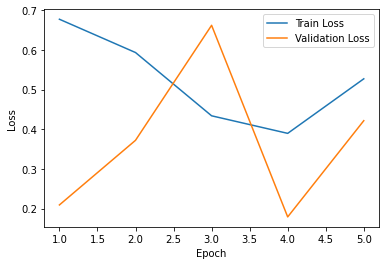

In [59]:
plt.plot(range(1, num_epochs+1), train_loss_per_epoch, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_loss_per_epoch, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
def get_image_text_similarity_score(image, text, model, processor):
      
    image = Image.open(BytesIO((requests.get(image)).content)).convert("RGB")
    inputs = processor(text=text, images=image_list, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    return outputs.logits_per_image

def get_most_similar_image(images, text, model, processor):
    
    logit_scores=[]
    
    for image in images:
        logit_scores.append(get_image_text_similarity_score(image, text, model, processor))
    logit_scores = torch.cat(logit_scores, dim=1)
    max_index=int(torch.argmax(logit_scores))
    
    return images[max_index]